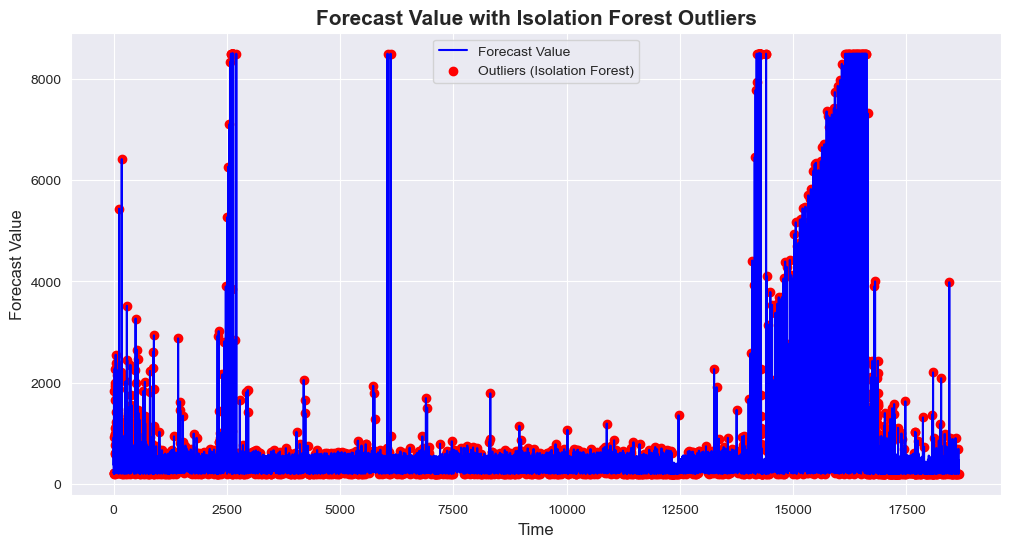

1567

In [1]:
from sklearn.ensemble import IsolationForest
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

new_file_path = 'HUAWEI_2.csv'
new_data = pd.read_csv(new_file_path)

# new_data = new_data[160:250]
# 设置孤立森林参数
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)  # 可调整参数

# 使用孤立森林模型
iso_labels = iso_forest.fit_predict(new_data[['forecast']])

# 标记离群点（在孤立森林中，-1标签表示离群点）
new_data['Outlier_IsolationForest'] = (iso_labels == -1)

# 创建折线图，并在其中标注离群点
plt.figure(figsize=(12, 6))

# 绘制forecast值的折线图
sns.lineplot(data=new_data, x=new_data.index, y='forecast', label='Forecast Value', color='blue')

# 标注离群点
outliers_iso_forest = new_data[new_data['Outlier_IsolationForest']]
plt.scatter(outliers_iso_forest.index, outliers_iso_forest['forecast'], color='red', label='Outliers (Isolation Forest)')

# 设置标题和标签
plt.title('Forecast Value with Isolation Forest Outliers', fontsize=15, fontweight='bold')
plt.xlabel('Time', fontsize=12)
plt.ylabel('Forecast Value', fontsize=12)
plt.legend()

# 显示图表
plt.show()

# 返回离群点的数量
outliers_iso_forest_count = outliers_iso_forest['forecast'].count()
outliers_iso_forest_count

In [2]:
TP = 0
TN = 0
FP = 0
FN = 0


for i, x in enumerate(new_data['Outlier_IsolationForest']):
    if x == True and new_data['label'][i] == 1:
        TP += 1
    elif x == False and new_data['label'][i] == 1:
        FN += 1
    elif x == True and new_data['label'][i] == 0:
        FP += 1
    else:
        TN += 1


acc = (TP+TN) / (TP+TN+FP+FN)
print(acc)
precision = TP / (TP + FP)
print(precision)
recall = TP / (TP + FN)
print(recall)
print(2*(precision*recall)/(precision+recall))

0.9347872682456329
0.22335673261008296
1.0
0.3651538862806468
